<a href="https://colab.research.google.com/github/mari-rufino-g/Vereadores_Brasil/blob/main/Mapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U plotly

     |████████████████████████████████| 20.6MB 138kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 6.6MB 26.6MB/s 
     |████████████████████████████████| 15.4MB 198kB/s 


In [ ]:
#Importando pacotes necessários
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

In [ ]:
#Caminho para os arquivos utilizados
pasta = '/content/drive/MyDrive/Colab Notebooks/Grafico - Brasil'
dados_2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Grafico - Brasil/vereadores_municipio_udemy.csv')
dados_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Grafico - Brasil/vereadores_cidade_20.csv')
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/Colab Notebooks/Grafico - Brasil/BRMUE250GC_SIR.shp'

In [ ]:
dados_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CD_MUNICIPIO             5567 non-null   int64  
 1   NM_MUNICIPIO             5567 non-null   object 
 2   VR_DESPESA_MAX_CAMPANHA  5567 non-null   float64
 3   QT_VOTOS_NOMINAIS        5567 non-null   int64  
 4   FEMININO                 5567 non-null   int64  
 5   MASCULINO                5567 non-null   int64  
 6   TOTAL_ELEITOS            5567 non-null   int64  
 7   PORCENTAGEM_MULHERES     5567 non-null   float64
 8   PORCENTAGEM_MULHERES_s   5567 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 391.6+ KB


In [ ]:
dados_2016.head()

,CD_MUNICIPIO,NM_MUNICIPIO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS,PORCENTAGEM_MULHERES,PORCENTAGEM_MULHERES_s
0,19,GUAJARÁ-MIRIM,118843.01,6226,0,11,11,0.000000,0.0
1,35,PORTO VELHO,2826635.54,61581,4,18,22,6.545455,7.0
2,51,JI-PARANÁ,791822.72,19571,2,14,16,12.500000,12.0
3,78,ARIQUEMES,812193.54,20014,1,16,17,5.882353,6.0
4,94,CACOAL,1066384.32,11709,1,11,12,8.333333,8.0


In [ ]:
dados_2016['PORCENTAGEM'] = round((dados_2016['FEMININO'] * 100 / dados_2016['TOTAL_ELEITOS']))
dados_2016.head()

,CD_MUNICIPIO,NM_MUNICIPIO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS,PORCENTAGEM_MULHERES,PORCENTAGEM_MULHERES_s,PORCENTAGEM
0,19,GUAJARÁ-MIRIM,118843.01,6226,0,11,11,0.000000,0.0,0.0
1,35,PORTO VELHO,2826635.54,61581,4,18,22,6.545455,7.0,18.0
2,51,JI-PARANÁ,791822.72,19571,2,14,16,12.500000,12.0,12.0
3,78,ARIQUEMES,812193.54,20014,1,16,17,5.882353,6.0,6.0
4,94,CACOAL,1066384.32,11709,1,11,12,8.333333,8.0,8.0


In [ ]:
dados_2016['PORCENTAGEM'].describe()

count    5567.000000
mean       13.760913
std        11.559395
min         0.000000
25%         6.000000
50%        11.000000
75%        22.000000
max        71.000000
Name: PORCENTAGEM, dtype: float64

In [ ]:
dados_2020['PORCENTAGEM'] = round((dados_2020['FEMININO'] * 100 / dados_2020['TOTAL_ELEITOS']))
dados_2020.head()

,CD_MUNICIPIO,NM_MUNICIPIO,NR_CPF_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS,PORCENTAGEM_MULHERES,PORCENTAGEM
0,19,GUAJARÁ-MIRIM,546642378026,172308.50,4585,0,14,14,0.0,0.0
1,35,PORTO VELHO,1183121680444,3377117.73,52062,2,21,23,9.0,9.0
2,51,JI-PARANÁ,837439139919,958416.99,15548,3,14,17,3.0,18.0
3,78,ARIQUEMES,640763727509,701275.08,11374,3,9,12,4.0,25.0
4,94,CACOAL,478052727287,1012348.60,7180,0,10,10,0.0,0.0


In [ ]:
dados_2020['PORCENTAGEM'].describe()

count    5480.000000
mean       16.289599
std        12.297355
min         0.000000
25%         9.000000
50%        12.000000
75%        22.000000
max        78.000000
Name: PORCENTAGEM, dtype: float64

Verificando em quantos municipios não há nem ao menos uma vereadora eleita em 2016 e em 2020

In [ ]:
teste1 = dados_2016[dados_2016['PORCENTAGEM'] == 0.0]
teste1

,CD_MUNICIPIO,NM_MUNICIPIO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS,PORCENTAGEM_MULHERES,PORCENTAGEM_MULHERES_s,PORCENTAGEM,Grau de Representatividade
0,19,GUAJARÁ-MIRIM,118843.01,6226,0,11,11,0.0,0.0,0.0,Sem mulheres na câmara
7,159,JARU,1004999.30,10697,0,15,15,0.0,0.0,0.0,Sem mulheres na câmara
13,272,CEREJEIRAS,86431.28,3427,0,8,8,0.0,0.0,0.0,Sem mulheres na câmara
17,353,SANTA LUZIA D OESTE,152215.76,2359,0,8,8,0.0,0.0,0.0,Sem mulheres na câmara
18,370,NOVA BRASILÂNDIA D OESTE,195785.73,3426,0,7,7,0.0,0.0,0.0,Sem mulheres na câmara
...,...,...,...,...,...,...,...,...,...,...,...
5550,98752,NOVA CANAÃ DO NORTE,197668.96,3593,0,9,9,0.0,0.0,0.0,Sem mulheres na câmara
5555,98850,PORTO ALEGRE DO NORTE,268987.85,5605,0,13,13,0.0,0.0,0.0,Sem mulheres na câmara
5558,98914,RESERVA DO CABAÇAL,86431.28,771,0,8,8,0.0,0.0,0.0,Sem mulheres na câmara
5561,98973,VERA,244781.91,2252,0,9,9,0.0,0.0,0.0,Sem mulheres na câmara


In [ ]:
teste2 = dados_2020[dados_2020['PORCENTAGEM'] == 0.0]
teste2

,CD_MUNICIPIO,NM_MUNICIPIO,NR_CPF_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS,PORCENTAGEM_MULHERES,PORCENTAGEM,Grau de Representatividade
0,19,GUAJARÁ-MIRIM,546642378026,172308.50,4585,0,14,14,0.0,0.0,Sem mulheres na câmara
4,94,CACOAL,478052727287,1012348.60,7180,0,10,10,0.0,0.0,Sem mulheres na câmara
5,116,PIMENTA BUENO,586893415848,781274.90,4755,0,10,10,0.0,0.0,Sem mulheres na câmara
12,272,CEREJEIRAS,963315560826,1034055.87,40434,0,26,26,0.0,0.0,Sem mulheres na câmara
16,353,SANTA LUZIA D OESTE,381110986968,173403.28,1763,0,8,8,0.0,0.0,Sem mulheres na câmara
...,...,...,...,...,...,...,...,...,...,...,...
5462,98736,NOVA OLÍMPIA,607039228399,193749.03,3323,0,9,9,0.0,0.0,Sem mulheres na câmara
5464,98779,NOVO SÃO JOAQUIM,401804654581,189348.36,2239,0,10,10,0.0,0.0,Sem mulheres na câmara
5474,98973,VERA,419274706741,247870.24,1906,0,8,8,0.0,0.0,Sem mulheres na câmara
5475,98990,VILA RICA,586445340292,144774.96,3461,0,10,10,0.0,0.0,Sem mulheres na câmara


Em 2020, o maior número percentual de mulheres na câmara dos vereadores foi 78%, enquanto que em 2016, a maior taxa tinha sido de 71%. Se comparado a 2016, a média subiu 2,6 pontos percentuais. 

In [ ]:
def grauderepresentatividade(dados_2016):
  if dados_2016['PORCENTAGEM'] == 0.0:
    return 'Sem mulheres na câmara'
  elif 0.1 < dados_2016['PORCENTAGEM'] < 5.0:
    return 'Entre 0,1% e 5%'
  elif 5.1 < dados_2016['PORCENTAGEM'] < 10.0:
    return 'Entre 5,1% e 10%'
  elif 10.1 < dados_2016['PORCENTAGEM'] < 20.0:
    return 'Entre 10,1% e 20%'
  elif 20.1 < dados_2016['PORCENTAGEM'] < 30.0:
    return 'Entre 20,1% e 30%'
  elif 30.1 < dados_2016['PORCENTAGEM'] < 40.0:
    return 'Entre 30,1% e 40%'
  elif 40.1 < dados_2016['PORCENTAGEM'] < 50.0:
    return 'Entre 40,1% e 50%'
  elif 50.1 < dados_2016['PORCENTAGEM'] < 60.0:
    return 'Entre 50,1% e 60%'
  elif 60.1 < dados_2016['PORCENTAGEM'] < 70.0:
    return 'Entre 60,1% e 70%'
  else:
    return 'Acima de 70%%'

In [ ]:
dados_2016['Grau de Representatividade'] = dados_2016.apply(grauderepresentatividade, axis=1)
dados_2016.head()

,CD_MUNICIPIO,NM_MUNICIPIO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS,PORCENTAGEM_MULHERES,PORCENTAGEM_MULHERES_s,PORCENTAGEM,Grau de Representatividade
0,19,GUAJARÁ-MIRIM,118843.01,6226,0,11,11,0.000000,0.0,0.0,Sem mulheres na câmara
1,35,PORTO VELHO,2826635.54,61581,4,18,22,6.545455,7.0,18.0,"Entre 10,1% e 20%"
2,51,JI-PARANÁ,791822.72,19571,2,14,16,12.500000,12.0,12.0,"Entre 10,1% e 20%"
3,78,ARIQUEMES,812193.54,20014,1,16,17,5.882353,6.0,6.0,"Entre 5,1% e 10%"
4,94,CACOAL,1066384.32,11709,1,11,12,8.333333,8.0,8.0,"Entre 5,1% e 10%"


In [ ]:
def grauderepresentatividade(dados_2020):
  if dados_2020['PORCENTAGEM'] == 0.0:
    return 'Sem mulheres na câmara'
  elif 0.1 < dados_2020['PORCENTAGEM'] < 5.0:
    return 'Entre 0,1% e 5%'
  elif 5.1 < dados_2020['PORCENTAGEM'] < 10.0:
    return 'Entre 5,1% e 10%'
  elif 10.1 < dados_2020['PORCENTAGEM'] < 20.0:
    return 'Entre 10,1% e 20%'
  elif 20.1 < dados_2020['PORCENTAGEM'] < 30.0:
    return 'Entre 20,1% e 30%'
  elif 30.1 < dados_2020['PORCENTAGEM'] < 40.0:
    return 'Entre 30,1% e 40%'
  elif 40.1 < dados_2020['PORCENTAGEM'] < 50.0:
    return 'Entre 40,1% e 50%'
  elif 50.1 < dados_2020['PORCENTAGEM'] < 60.0:
    return 'Entre 50,1% e 60%'
  elif 60.1 < dados_2020['PORCENTAGEM'] < 70.0:
    return 'Entre 60,1% e 70%'
  else:
    return 'Acima de 70%%'

In [ ]:
dados_2020['Grau de Representatividade'] = dados_2020.apply(grauderepresentatividade, axis=1)
dados_2020.head()

,CD_MUNICIPIO,NM_MUNICIPIO,NR_CPF_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS,PORCENTAGEM_MULHERES,PORCENTAGEM,Grau de Representatividade
0,19,GUAJARÁ-MIRIM,546642378026,172308.50,4585,0,14,14,0.0,0.0,Sem mulheres na câmara
1,35,PORTO VELHO,1183121680444,3377117.73,52062,2,21,23,9.0,9.0,"Entre 5,1% e 10%"
2,51,JI-PARANÁ,837439139919,958416.99,15548,3,14,17,3.0,18.0,"Entre 10,1% e 20%"
3,78,ARIQUEMES,640763727509,701275.08,11374,3,9,12,4.0,25.0,"Entre 20,1% e 30%"
4,94,CACOAL,478052727287,1012348.60,7180,0,10,10,0.0,0.0,Sem mulheres na câmara


In [ ]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  5572 non-null   object  
 1   CD_GEOCMU   5572 non-null   object  
 2   geometry    5572 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 130.7+ KB


In [ ]:
geo_df['NM_MUNICIP'] = geo_df['NM_MUNICIP'].str.upper()

In [ ]:
vereadoras_2016_geo_df = geo_df.merge(dados_2016, left_on='NM_MUNICIP', right_on='NM_MUNICIPIO')
vereadoras_2020_geo_df = geo_df.merge(dados_2020, left_on='NM_MUNICIP', right_on='NM_MUNICIPIO')

In [ ]:
# Passo quais são as categorias na ordem que quero
representacao_cat_type = pd.CategoricalDtype(categories=['Sem mulheres na câmara','Entre 0,1% e 5%','Entre 5,1% e 10%', 'Entre 10,1% e 20%','Entre 20,1% e 30%', 'Entre 30,1% e 40%', 'Entre 40,1% e 50%', 'Entre 50,1% e 60%', 'Entre 60,1% e 70%', 'Acima de 70%%'   ],ordered=True)

In [ ]:
# Atribuo a coluna grau de representatividade a mesma coluna agora convertida (metodo astype) com o tipo que acabei de criar acima
vereadoras_2016_geo_df['Grau de Representatividade'] = vereadoras_2016_geo_df['Grau de Representatividade'].astype(representacao_cat_type)
vereadoras_2020_geo_df['Grau de Representatividade'] = vereadoras_2016_geo_df['Grau de Representatividade'].astype(representacao_cat_type)

In [ ]:
#Verificando se a ordem foi aplicada
vereadoras_2016_geo_df['Grau de Representatividade']

0             Entre 5,1% e 10%
1       Sem mulheres na câmara
2             Entre 5,1% e 10%
3       Sem mulheres na câmara
4             Entre 5,1% e 10%
                 ...          
6149         Entre 10,1% e 20%
6150             Acima de 70%%
6151    Sem mulheres na câmara
6152         Entre 30,1% e 40%
6153          Entre 5,1% e 10%
Name: Grau de Representatividade, Length: 6154, dtype: category
Categories (10, object): ['Sem mulheres na câmara' < 'Entre 0,1% e 5%' < 'Entre 5,1% e 10%' <
                          'Entre 10,1% e 20%' ... 'Entre 40,1% e 50%' < 'Entre 50,1% e 60%' <
                          'Entre 60,1% e 70%' < 'Acima de 70%%']

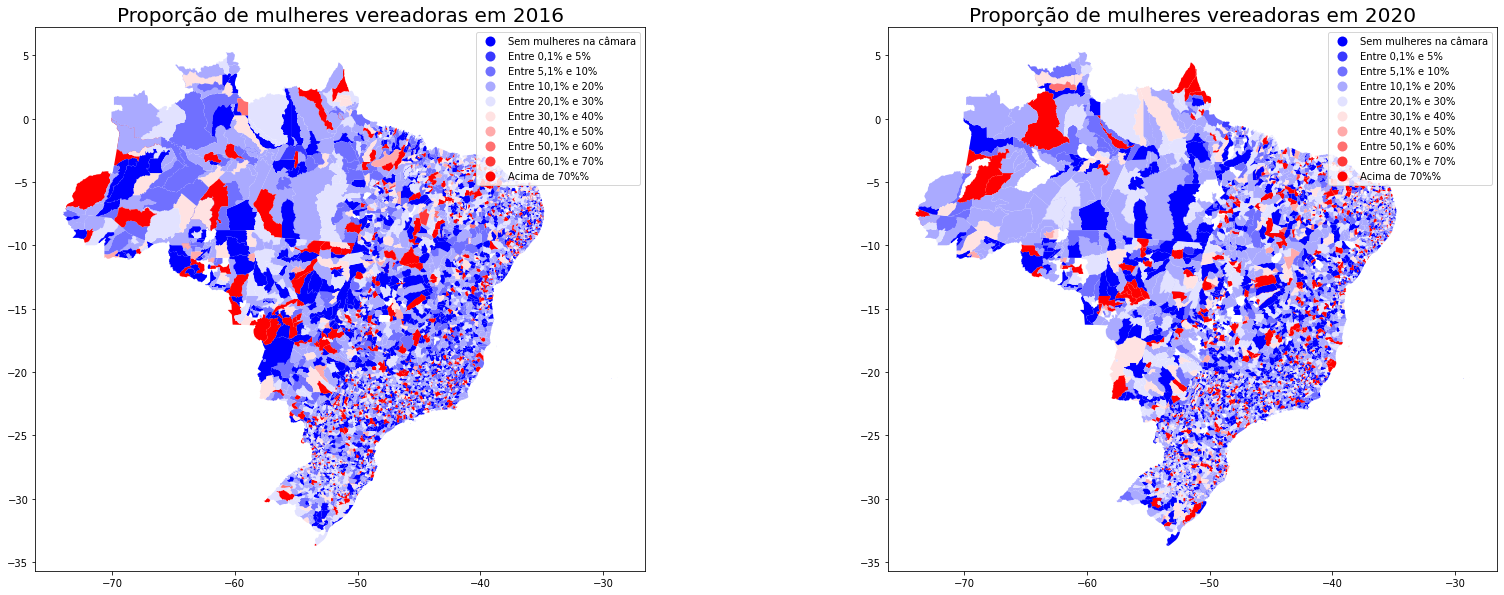

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(28,10))

ax[0].set_title('Proporção de mulheres vereadoras em 2016', color='black', size=20)
ax[1].set_title('Proporção de mulheres vereadoras em 2020', color='black', size=20)

vereadoras_2016_geo_df.plot(column='Grau de Representatividade', legend=True, cmap='bwr', ax=ax[0])
vereadoras_2020_geo_df.plot(column='Grau de Representatividade', legend=True, cmap='bwr', ax=ax[1])